In [48]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# set the options to see all columns, rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_info_columns', 1001)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline
plt.rc('ytick',labelsize=15)
# To use 한글 font in graphs
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
# 그래프에서 음수값이 나올 때, 깨지는 현상 방지
plt.rc('axes', unicode_minus = False)
import itertools

In [49]:
data_raw =pd.read_csv('./datas/train/dataset_0225_eysight.csv')

In [50]:
data = data_raw.copy()

In [51]:
data = data.reset_index(drop=True)

In [52]:
data['고혈압 의사 판정'].value_counts()

0.00    889523
1.00     36201
Name: 고혈압 의사 판정, dtype: int64

In [53]:
data['당뇨병 의사 판정'].value_counts()

0.00    863466
1.00     62258
Name: 당뇨병 의사 판정, dtype: int64

In [54]:
data["지질혈증 의사 판정"]=(data['총콜레스테롤']>=240)|(data["트리글리세라이드"]>=200)|(data["HDL콜레스테롤"]<40)|(data["LDL콜레스테롤"]>=160)
data["지질혈증 의사 판정"]=data["지질혈증 의사 판정"].replace({True:1,False:0})

In [55]:
data['지질혈증 의사 판정'].value_counts()

0    682036
1    243688
Name: 지질혈증 의사 판정, dtype: int64

In [56]:
data['합병증'] = (((data['당뇨병 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1)) 
               | ((data['지질혈증 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1))
               | ((data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1))
               | ((data['고혈압 의사 판정'] == 1) & (data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1)))

data["합병증"]=data["합병증"].replace({True:1,False:0})

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925724 entries, 0 to 925723
Data columns (total 32 columns):
가입자일련번호        925724 non-null int64
성별코드           925724 non-null int64
연령대코드(5세단위)    925724 non-null int64
시도코드           925724 non-null int64
신장(5Cm단위)      925724 non-null float64
체중(5Kg단위)      925724 non-null float64
허리둘레           925724 non-null float64
시력(좌)          925724 non-null int64
시력(우)          925724 non-null int64
청력(좌)          925724 non-null float64
청력(우)          925724 non-null float64
수축기혈압          925724 non-null float64
이완기혈압          925724 non-null float64
식전혈당(공복혈당)     925724 non-null float64
총콜레스테롤         925724 non-null float64
트리글리세라이드       925724 non-null float64
HDL콜레스테롤       925724 non-null float64
LDL콜레스테롤       925724 non-null float64
혈색소            925724 non-null float64
요단백            925724 non-null float64
혈청크레아티닌        925724 non-null float64
(혈청지오티)AST     925724 non-null float64
(혈청지오티)ALT     925724 non-null float64
감마지티

In [58]:
data.isnull().sum().sum()

0

In [59]:
data['합병증'].value_counts()

0    888626
1     37098
Name: 합병증, dtype: int64

In [60]:
#병 1개
data['당뇨병_단일'] = ((data['당뇨병 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 0) & (data['지질혈증 의사 판정'] == 0))
data['고혈압_단일'] = ((data['당뇨병 의사 판정'] == 0) & (data['고혈압 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 0))
data['지질혈증_단일'] = ((data['당뇨병 의사 판정'] == 0) & (data['고혈압 의사 판정'] == 0) & (data['지질혈증 의사 판정'] == 1))
#병 2개
data['합병증_(당뇨_고혈압)'] = ((data['당뇨병 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 0)) 
data['합병증_(지질_고혈압)'] = ((data['지질혈증 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1) & (data['당뇨병 의사 판정'] == 0))
data['합병증_(당뇨_지질)'] = ((data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 0))
#병 3개
data['합병증 종합'] = ((data['고혈압 의사 판정'] == 1) & (data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1))

data['당뇨병_단일'] = data['당뇨병_단일'].replace({True:1,False:0})
data['고혈압_단일'] = data['고혈압_단일'].replace({True:1,False:0})
data['지질혈증_단일'] = data['지질혈증_단일'].replace({True:1,False:0})
data['합병증_(당뇨_고혈압)'] = data['합병증_(당뇨_고혈압)'].replace({True:1,False:0})
data['합병증_(지질_고혈압)'] = data['합병증_(지질_고혈압)'].replace({True:1,False:0})
data['합병증_(당뇨_지질)'] = data['합병증_(당뇨_지질)'].replace({True:1,False:0})
data['합병증 종합'] = data['합병증 종합'].replace({True:1,False:0})

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925724 entries, 0 to 925723
Data columns (total 39 columns):
가입자일련번호         925724 non-null int64
성별코드            925724 non-null int64
연령대코드(5세단위)     925724 non-null int64
시도코드            925724 non-null int64
신장(5Cm단위)       925724 non-null float64
체중(5Kg단위)       925724 non-null float64
허리둘레            925724 non-null float64
시력(좌)           925724 non-null int64
시력(우)           925724 non-null int64
청력(좌)           925724 non-null float64
청력(우)           925724 non-null float64
수축기혈압           925724 non-null float64
이완기혈압           925724 non-null float64
식전혈당(공복혈당)      925724 non-null float64
총콜레스테롤          925724 non-null float64
트리글리세라이드        925724 non-null float64
HDL콜레스테롤        925724 non-null float64
LDL콜레스테롤        925724 non-null float64
혈색소             925724 non-null float64
요단백             925724 non-null float64
혈청크레아티닌         925724 non-null float64
(혈청지오티)AST      925724 non-null float64
(혈청지오티)ALT      92572

In [62]:
data['하나만걸린사람'] = data['당뇨병_단일'] + data['고혈압_단일'] + data['지질혈증_단일']

In [63]:
data['하나만걸린사람'].unique()

array([1, 0])

In [64]:
data = data.reset_index(drop=True)

In [65]:
data['당뇨병_단일'].value_counts()

0    889473
1     36251
Name: 당뇨병_단일, dtype: int64

In [66]:
data['고혈압_단일'].value_counts()

0    905312
1     20412
Name: 고혈압_단일, dtype: int64

In [67]:
data['지질혈증_단일'].value_counts()

0    716468
1    209256
Name: 지질혈증_단일, dtype: int64

In [68]:
data['합병증_(당뇨_지질)'].value_counts()
#2.1%

0    904415
1     21309
Name: 합병증_(당뇨_지질), dtype: int64

In [69]:
data['합병증_(지질_고혈압)'].value_counts()
#1%

0    914633
1     11091
Name: 합병증_(지질_고혈압), dtype: int64

In [70]:
data['합병증_(당뇨_고혈압)'].value_counts()

0    923058
1      2666
Name: 합병증_(당뇨_고혈압), dtype: int64

In [71]:
data['합병증 종합'].value_counts()

0    923692
1      2032
Name: 합병증 종합, dtype: int64

In [72]:
data['하나만걸린사람'].value_counts()

0    659805
1    265919
Name: 하나만걸린사람, dtype: int64

In [73]:
len(data)

925724

In [74]:
data['간기능 이상여부'].value_counts()

0.00    893314
1.00     32410
Name: 간기능 이상여부, dtype: int64

In [75]:
len(data)

925724

In [76]:
def illness(row):
    if row['합병증_(당뇨_지질)'] == 1:
        return 1
    elif row['합병증_(지질_고혈압)'] == 1 :
        return 2
    elif row['합병증_(당뇨_고혈압)'] == 1 :
        return 3
    elif row['합병증 종합'] == 1 :
        return 4
    elif (row['당뇨병 의사 판정'] == 0) & (row['고혈압 의사 판정'] == 0) & (row['지질혈증 의사 판정'] == 0) :
        return 5
    else :
        return 0
    
        

In [77]:
data_illness = data.copy()
data_illness['합병증_종류']=data_illness.apply(illness, axis=1)

In [78]:
len(data_illness)

925724

In [79]:
# 5를 날리면 정상인 애들만 날아갑니다.
data_illness = data_illness[data_illness['합병증_종류'] !=5]
# 여기서 0은 질병이 하나만 걸린 새끼들 입니다. == 합병증이 아닌 새끼

In [80]:
data_illness['합병증_종류'].value_counts()

0    265919
1     21309
2     11091
3      2666
4      2032
Name: 합병증_종류, dtype: int64

In [81]:
data_illness["BMI"] = data_illness["체중(5Kg단위)"]*10000/(data_illness["신장(5Cm단위)"]*data_illness["신장(5Cm단위)"])

In [82]:
#data_illness.to_csv('./datas/train/dataset_0225_2041.csv',index=False)

# 1. 당뇨병 환자들로 모델링 시작!!!!!!!!!!!!!!!!!!!!!!!ㅎㅎ

In [83]:
data_dc = data_illness.copy()

In [84]:
data_dc=data_illness[['가입자일련번호','성별코드', '연령대코드(5세단위)', '허리둘레', '수축기혈압', '이완기혈압','당뇨병_단일','합병증_종류','BMI','구강검진 수검여부']]

In [85]:
data_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303017 entries, 0 to 925723
Data columns (total 10 columns):
가입자일련번호        303017 non-null int64
성별코드           303017 non-null int64
연령대코드(5세단위)    303017 non-null int64
허리둘레           303017 non-null float64
수축기혈압          303017 non-null float64
이완기혈압          303017 non-null float64
당뇨병_단일         303017 non-null int64
합병증_종류         303017 non-null int64
BMI            303017 non-null float64
구강검진 수검여부      303017 non-null int64
dtypes: float64(4), int64(6)
memory usage: 25.4 MB


In [86]:
data_dc['당뇨병_단일'].value_counts()

0    266766
1     36251
Name: 당뇨병_단일, dtype: int64

In [87]:
x_data = data_dc.drop(['합병증_종류',], axis = 1)
y_data = data_dc['합병증_종류']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size = 0.3, random_state=42)

In [89]:
x_test_id = x_test.copy().reset_index(drop=True)
x_train = x_train.drop('가입자일련번호', axis = 1)
x_test = x_test.drop('가입자일련번호', axis = 1)

In [90]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(212111, 8)
(212111,)
(90906, 8)
(90906,)


In [91]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
# svm = SVC(probability=True)
# svm.fit(x_train, y_train)

In [93]:
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.863496358876


In [94]:
from sklearn.metrics import confusion_matrix, classification_report
print(f1_score(y_test, y_pred, average='micro'))
cnf = confusion_matrix(y_test, y_pred,)

0.863496358876


In [95]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """model
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[77482   941  1099    95    58]
 [ 6253   165     0     0     0]
 [ 2495     0   805    56    43]
 [  626     0   158    32    14]
 [  392     0   164    15    13]]


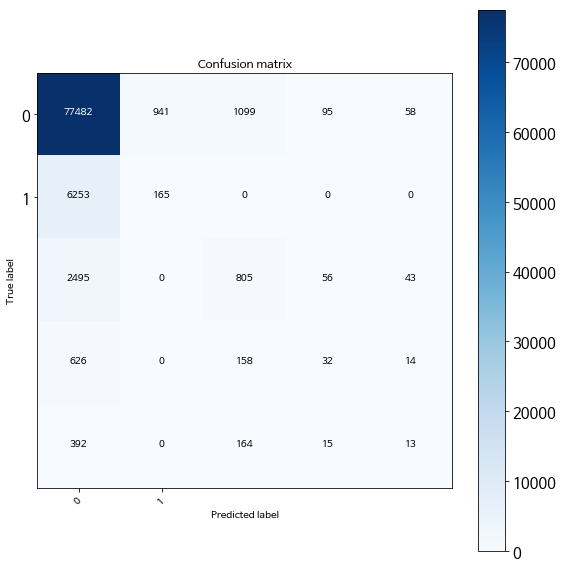

In [96]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf, classes=[0,1],
                      title='Confusion matrix')

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     79675
           1       0.15      0.03      0.04      6418
           2       0.36      0.24      0.29      3399
           3       0.16      0.04      0.06       830
           4       0.10      0.02      0.04       584

   micro avg       0.86      0.86      0.86     90906
   macro avg       0.33      0.26      0.27     90906
weighted avg       0.80      0.86      0.83     90906



In [98]:
y_pred_proba = rf.predict_proba(x_test)

In [99]:
y_pred_proba.shape

(90906, 5)

In [100]:
rf_proba = pd.DataFrame(y_pred_proba,columns=['합병증_없음','합병증_(지질_고혈압)', '합병증_(당뇨_지질)',
                                              '합병증_(당뇨_고혈압)', '합병증 종합',])

In [101]:
rf_proba = rf_proba.reindex_axis(['환자번호','합병증_(지질_고혈압)', '합병증_(당뇨_지질)',
                                  '합병증_(당뇨_고혈압)', '합병증 종합','병있냐없냐'], axis=1)

In [102]:
sorted_rf_proba = rf_proba.sort_values('합병증_(당뇨_지질)', ascending = False)

In [103]:
sorted_rf_proba[sorted_rf_proba['병있냐없냐']==1]

,환자번호,합병증_(지질_고혈압),합병증_(당뇨_지질),합병증_(당뇨_고혈압),합병증 종합,병있냐없냐


In [104]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = x_train.columns
ds_feature_importance["Importance"] = rf.feature_importances_
#ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance=ds_feature_importance.sort_values("Importance", ascending=False)
ds_feature_importance.round(3)

,Feature,Importance
3,수축기혈압,0.25
4,이완기혈압,0.24
6,BMI,0.20
2,허리둘레,0.18
1,연령대코드(5세단위),0.09
5,당뇨병_단일,0.01
7,구강검진 수검여부,0.01
0,성별코드,0.01


In [105]:
data_illness.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '구강검진 수검여부', '당뇨병 의사 판정', '고혈압 의사 판정', '간기능 이상여부', '알콜성간염여부', '지질혈증 의사 판정', '합병증', '당뇨병_단일', '고혈압_단일', '지질혈증_단일', '합병증_(당뇨_고혈압)', '합병증_(지질_고혈압)', '합병증_(당뇨_지질)', '합병증 종합', '하나만걸린사람', '합병증_종류', 'BMI'], dtype='object')

# 2. 고혈압 환자들로 모델링 

In [106]:
data_hbp = data_illness.copy()

data_hbp=data_illness[['가입자일련번호','성별코드',
                      '연령대코드(5세단위)', '허리둘레', '수축기혈압',
                      '이완기혈압','고혈압_단일','합병증_종류','BMI','구강검진 수검여부']]

data_hbp.info()

data_hbp['고혈압_단일'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 303017 entries, 0 to 925723
Data columns (total 10 columns):
가입자일련번호        303017 non-null int64
성별코드           303017 non-null int64
연령대코드(5세단위)    303017 non-null int64
허리둘레           303017 non-null float64
수축기혈압          303017 non-null float64
이완기혈압          303017 non-null float64
고혈압_단일         303017 non-null int64
합병증_종류         303017 non-null int64
BMI            303017 non-null float64
구강검진 수검여부      303017 non-null int64
dtypes: float64(4), int64(6)
memory usage: 25.4 MB


0    282605
1     20412
Name: 고혈압_단일, dtype: int64

In [107]:
x_data = data_hbp.drop(['합병증_종류',], axis = 1)
y_data = data_hbp['합병증_종류']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size = 0.3, random_state=42)

x_test_id = x_test.copy().reset_index(drop=True)
x_train = x_train.drop('가입자일련번호', axis = 1)
x_test = x_test.drop('가입자일련번호', axis = 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(212111, 8)
(212111,)
(90906, 8)
(90906,)


In [108]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report
print(f1_score(y_test, y_pred, average='micro'))
cnf = confusion_matrix(y_test, y_pred,)
print(cnf)

0.903878731877
0.903878731877
[[78859   816     0     0     0]
 [ 6315   103     0     0     0]
 [    6     0  3120   170   103]
 [    1     0   736    65    28]
 [    0     0   523    40    21]]


In [109]:
y_pred_proba = rf.predict_proba(x_test)

In [110]:
y_pred_proba.shape

len(data_hbp['가입자일련번호'])

303017

In [111]:
rf_proba = pd.DataFrame(y_pred_proba,columns=['합병증_없음','합병증_(지질_고혈압)', '합병증_(당뇨_지질)', '합병증_(당뇨_고혈압)', '합병증 종합',])
rf_proba['환자번호'] =  x_test_id['가입자일련번호']
rf_proba['병있냐없냐'] = x_test_id['고혈압_단일']
rf_proba = rf_proba.reindex_axis(['환자번호','합병증_(지질_고혈압)', '합병증_(당뇨_지질)',
                                  '합병증_(당뇨_고혈압)', '합병증 종합','병있냐없냐'], axis=1)
# rf_proba = rf_proba.drop('합병증_없음',axis = 1)
sorted_rf_proba = rf_proba.sort_values('합병증_(지질_고혈압)', ascending = False)


In [112]:
sorted_rf_proba

,환자번호,합병증_(지질_고혈압),합병증_(당뇨_지질),합병증_(당뇨_고혈압),합병증 종합,병있냐없냐
40778,102562,1.00,0.00,0.00,0.00,0
60965,941052,1.00,0.00,0.00,0.00,0
13831,152900,1.00,0.00,0.00,0.00,0
11810,836149,1.00,0.00,0.00,0.00,0
84398,659683,1.00,0.00,0.00,0.00,0
55098,948474,1.00,0.00,0.00,0.00,0
65924,799052,1.00,0.00,0.00,0.00,0
39893,779718,1.00,0.00,0.00,0.00,0
69112,460615,1.00,0.00,0.00,0.00,0
73654,24982,1.00,0.00,0.00,0.00,0


In [113]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = x_train.columns
ds_feature_importance["Importance"] = rf.feature_importances_
#ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance=ds_feature_importance.sort_values("Importance", ascending=False)
ds_feature_importance.round(3)

,Feature,Importance
3,수축기혈압,0.27
4,이완기혈압,0.23
6,BMI,0.16
2,허리둘레,0.14
5,고혈압_단일,0.10
1,연령대코드(5세단위),0.08
7,구강검진 수검여부,0.01
0,성별코드,0.01


# 3. 이상지질혈증으로 모델링

In [114]:
data_illness.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '구강검진 수검여부', '당뇨병 의사 판정', '고혈압 의사 판정', '간기능 이상여부', '알콜성간염여부', '지질혈증 의사 판정', '합병증', '당뇨병_단일', '고혈압_단일', '지질혈증_단일', '합병증_(당뇨_고혈압)', '합병증_(지질_고혈압)', '합병증_(당뇨_지질)', '합병증 종합', '하나만걸린사람', '합병증_종류', 'BMI'], dtype='object')

In [115]:
data_ab = data_illness.copy()

data_ab=data_illness[['가입자일련번호','성별코드',
                      '연령대코드(5세단위)', '허리둘레', '수축기혈압',
                      '이완기혈압','지질혈증_단일','합병증_종류','BMI','구강검진 수검여부']]

data_ab.info()

data_ab['지질혈증_단일'].value_counts()


x_data = data_ab.drop(['합병증_종류',], axis = 1)
y_data = data_ab['합병증_종류']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size = 0.3, random_state=42)

x_test_id = x_test.copy().reset_index(drop=True)
x_train = x_train.drop('가입자일련번호', axis = 1)
x_test = x_test.drop('가입자일련번호', axis = 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 303017 entries, 0 to 925723
Data columns (total 10 columns):
가입자일련번호        303017 non-null int64
성별코드           303017 non-null int64
연령대코드(5세단위)    303017 non-null int64
허리둘레           303017 non-null float64
수축기혈압          303017 non-null float64
이완기혈압          303017 non-null float64
지질혈증_단일        303017 non-null int64
합병증_종류         303017 non-null int64
BMI            303017 non-null float64
구강검진 수검여부      303017 non-null int64
dtypes: float64(4), int64(6)
memory usage: 25.4 MB
(212111, 8)
(212111,)
(90906, 8)
(90906,)


In [116]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report
print(f1_score(y_test, y_pred, average='micro'))
cnf = confusion_matrix(y_test, y_pred,)
print(cnf)

0.865157415352
0.865157415352
[[76259  2091  1158   106    61]
 [ 4871  1547     0     0     0]
 [ 2500     0   802    54    43]
 [  638     0   151    30    11]
 [  428     0   129    17    10]]


In [117]:
y_pred_proba = rf.predict_proba(x_test)

rf_proba = pd.DataFrame(y_pred_proba,columns=['합병증_없음','합병증_(지질_고혈압)',
                                              '합병증_(당뇨_지질)', '합병증_(당뇨_고혈압)', '합병증 종합',])
rf_proba['환자번호'] =  x_test_id['가입자일련번호']
rf_proba['병있냐없냐'] = x_test_id['지질혈증_단일']

rf_proba = rf_proba.reindex_axis(['환자번호','합병증_(지질_고혈압)', '합병증_(당뇨_지질)',
                                  '합병증_(당뇨_고혈압)', '합병증 종합','병있냐없냐'], axis=1)

sorted_rf_proba = rf_proba.sort_values('합병증_(당뇨_지질)', ascending = False)


In [118]:
ill_prob = sorted_rf_proba[sorted_rf_proba['병있냐없냐']==1]

In [119]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = x_train.columns
ds_feature_importance["Importance"] = rf.feature_importances_
#ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance=ds_feature_importance.sort_values("Importance", ascending=False)
ds_feature_importance.round(3)

,Feature,Importance
3,수축기혈압,0.20
5,지질혈증_단일,0.20
4,이완기혈압,0.19
2,허리둘레,0.16
6,BMI,0.15
1,연령대코드(5세단위),0.08
7,구강검진 수검여부,0.01
0,성별코드,0.01


In [120]:
ill_prob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62683 entries, 51828 to 45453
Data columns (total 6 columns):
환자번호            62683 non-null int64
합병증_(지질_고혈압)    62683 non-null float64
합병증_(당뇨_지질)     62683 non-null float64
합병증_(당뇨_고혈압)    62683 non-null float64
합병증 종합          62683 non-null float64
병있냐없냐           62683 non-null int64
dtypes: float64(4), int64(2)
memory usage: 3.3 MB


In [ ]:
plt.figure(figsize=(10,10))
ill_prob.plot.pie(y='합병증_(지질_고혈압)')